In [1]:
#1. Add library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_log_error as msle
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
data = pd.read_csv('D:\CTG.csv')
data

,Date,Price,Open,High,Low,Vol.,Change %
0,1/27/2014,10379.9,10379.9,10502.7,10318.5,544.57K,0.00%
1,2/6/2014,10318.5,10318.5,10379.9,10195.6,956.13K,-0.59%
2,2/7/2014,10257.0,10257.0,10379.9,10195.6,739.88K,-0.60%
3,2/10/2014,10195.6,10195.6,10318.5,10134.2,1.47M,-0.60%
4,2/11/2014,10195.6,10257.0,10379.9,10134.2,1.86M,0.00%
...,...,...,...,...,...,...,...
2466,12/15/2023,26700.0,26500.0,26850.0,26350.0,3.97M,-0.19%
2467,12/18/2023,26050.0,26500.0,26700.0,26050.0,3.84M,-2.43%
2468,12/19/2023,26500.0,26100.0,26500.0,25950.0,2.31M,1.73%
2469,12/20/2023,26550.0,26300.0,26600.0,26200.0,2.39M,0.19%


In [3]:
# Xử lý dữ liệu
prices = data['Price']

In [4]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [5]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.3)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [6]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [7]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [8]:
X_train.shape

(1699, 30, 1)

In [9]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [10]:
# 8. Define LSTM Model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(time_steps,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [11]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100

27/27 [==============================] - 6s 35ms/step - loss: 0.0088
Epoch 2/100
27/27 [==============================] - 1s 37ms/step - loss: 0.0013
Epoch 3/100
27/27 [==============================] - 1s 35ms/step - loss: 0.0011
Epoch 4/100
27/27 [==============================] - 1s 39ms/step - loss: 0.0010
Epoch 5/100
27/27 [==============================] - 1s 38ms/step - loss: 8.6324e-04
Epoch 6/100
27/27 [==============================] - 1s 38ms/step - loss: 7.9078e-04
Epoch 7/100
27/27 [==============================] - 1s 37ms/step - loss: 6.9119e-04
Epoch 8/100
27/27 [==============================] - 1s 36ms/step - loss: 6.8611e-04
Epoch 9/100
27/27 [==============================] - 1s 38ms/step - loss: 6.2911e-04
Epoch 10/100
27/27 [==============================] - 1s 40ms/step - loss: 5.8986e-04
Epoch 11/100
27/27 [==============================] - 1s 42ms/step - loss: 6.1916e-04
Epoch 12/100
27/27 [==============================] - 1s 42ms/step - loss: 6.1

In [12]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

23/23 [==============================] - 6s 18ms/step
[[2472]
 [2473]
 [2474]
 [2475]
 [2476]
 [2477]
 [2478]
 [2479]
 [2480]
 [2481]
 [2482]
 [2483]
 [2484]
 [2485]
 [2486]
 [2487]
 [2488]
 [2489]
 [2490]
 [2491]
 [2492]
 [2493]
 [2494]
 [2495]
 [2496]
 [2497]
 [2498]
 [2499]
 [2500]
 [2501]]
1/1 [==============================] - 0s 179ms/step
[29075.773 29255.943 29052.531 29059.693 29562.105 29989.572 29963.775
 29267.283 29209.508 29101.562 29399.346 28880.88  29432.875 29115.748
 29003.518 29142.58  25323.143 25990.295 26442.283 26380.92  26526.66
 26755.605 26677.36  26571.98  26733.629 26432.186 26459.838 26432.111
 25707.06  26307.818]


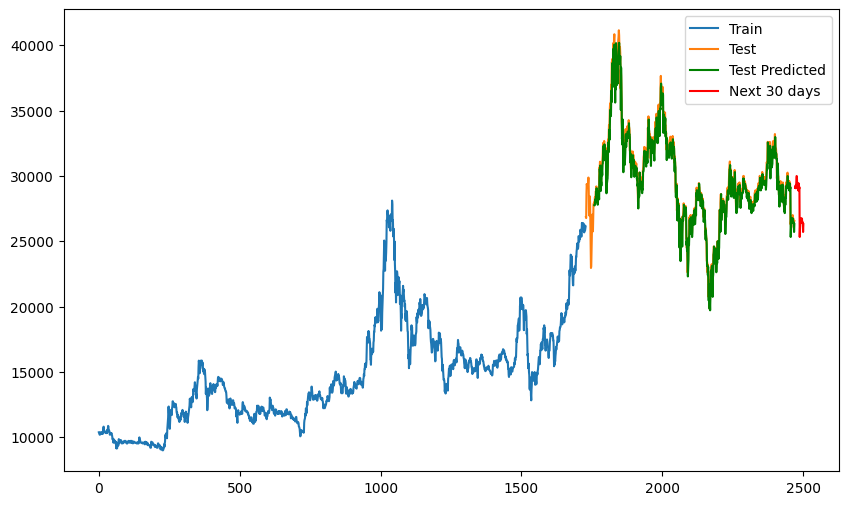

In [13]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Next 30 days')

plt.legend()
plt.show()

In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)

y_test1 = scaler.inverse_transform(y_test)


# Tính MAE cho testing
mae_test = mean_absolute_error(y_test1, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test1, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test1, y_test_predicted, squared=False)

# Tính MSLE cho testing
msle_test = mean_squared_log_error(y_test1, y_test_predicted, squared=False)




23/23 [==============================] - 1s 18ms/step


In [15]:
mape_test *= 100

print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))
print("MSLE:", round(msle_test,3))



MAPE: 1.936
MAE: 578.555
RMSE: 770.444
MSLE: 0.026
